# All function can look inside functions.ipynb

In [191]:
%run -i functions.ipynb

## - Do this for your first time to change from text file to dataframe
## - Create "raw_df" as folder to keep those dataframe

In [85]:
city_list = ["Bangkok", "Chanthaburi", "Chiang Mai", "Kanchanaburi", "Khon Kaen", "Songkhla"]
for city in city_list:
    start = time()
    info_df, df = txt_to_df_with_shift_datetime("PM2.5_kaggle 2021/"+city+"/Train/"+"_".join(city.split(" "))+".txt")
    info_df.to_csv("raw_df/"+city+"_info.csv", index = False, encoding = "UTF-8")
    df.to_csv("raw_df/"+city+".csv", index = False, encoding = "UTF-8")
    end = time()
    elapsed_time = str(end-start)
    print(city + " Finish")
    print("Elapsed time = " + elapsed_time)

Bangkok Finish
Elapsed time = 54.437463998794556
Chanthaburi Finish
Elapsed time = 58.89422965049744
Chiang Mai Finish
Elapsed time = 59.933624267578125
Kanchanaburi Finish
Elapsed time = 62.14124011993408
Khon Kaen Finish
Elapsed time = 26.44448161125183
Songkhla Finish
Elapsed time = 64.2871778011322


In [172]:
bangkok_df = pd.read_csv("raw_df/Bangkok.csv")
chanthaburi_df = pd.read_csv("raw_df/Chanthaburi.csv")
chiangmai_df = pd.read_csv("raw_df/Chiang Mai.csv")
Kanchanaburi_df = pd.read_csv("raw_df/Kanchanaburi.csv")
khonkaen_df = pd.read_csv("raw_df/Khon Kaen.csv")
songkhla_df = pd.read_csv("raw_df/Songkhla.csv")

In [89]:
bangkok_info_df = pd.read_csv("raw_df/Bangkok_info.csv")
chanthaburi_info_df = pd.read_csv("raw_df/Chanthaburi_info.csv")
chiangmai_info_df = pd.read_csv("raw_df/Chiang Mai_info.csv")
Kanchanaburi_info_df = pd.read_csv("raw_df/Kanchanaburi.csv")
khonkaen_info_df = pd.read_csv("raw_df/Khon Kaen_info.csv")
songkhla_info_df = pd.read_csv("raw_df/Songkhla_info.csv")

# Cleaning data
## 1) Bangkok
### 1.1) See information from DataFrame

In [90]:
bangkok_info_df

,Country,City,City (ASCII),Region,Region (ASCII),Population,Latitude,Longitude,Time Zone
0,Thailand,Bangkok,Bangkok,Bangkok,Bangkok,5104476,13.754,100.5014,Asia/Bangkok


In [151]:
bangkok_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         1 non-null      object 
 1   City            1 non-null      object 
 2   City (ASCII)    1 non-null      object 
 3   Region          1 non-null      object 
 4   Region (ASCII)  1 non-null      object 
 5   Population      1 non-null      int64  
 6   Latitude        1 non-null      float64
 7   Longitude       1 non-null      float64
 8   Time Zone       1 non-null      object 
dtypes: float64(2), int64(1), object(6)
memory usage: 200.0+ bytes


In [87]:
bangkok_df.head(3)

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective,datetime
0,2016,3,3,8,62.9,1.0,0,2016-03-03 15:00:00
1,2016,3,3,9,62.9,1.0,0,2016-03-03 16:00:00
2,2016,3,3,10,55.5,1.0,0,2016-03-03 17:00:00


In [88]:
bangkok_df.describe()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
count,24393.000000,24393.000000,24393.000000,24393.000000,24393.000000,24393.000000,24393.0
mean,2017.170910,6.556963,15.702292,11.479769,25.553921,0.521420,0.0
std,0.910438,3.412274,8.788960,6.924978,14.053030,0.499551,0.0
min,2016.000000,1.000000,1.000000,0.000000,2.500000,0.000000,0.0
25%,2016.000000,4.000000,8.000000,5.000000,15.400000,0.000000,0.0
50%,2017.000000,7.000000,16.000000,11.000000,21.900000,1.000000,0.0
75%,2018.000000,10.000000,23.000000,17.000000,32.200000,1.000000,0.0
max,2019.000000,12.000000,31.000000,23.000000,115.400000,1.000000,0.0


In [150]:
bangkok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24393 entries, 0 to 24392
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           24393 non-null  int64  
 1   Month          24393 non-null  int64  
 2   Day            24393 non-null  int64  
 3   UTC Hour       24393 non-null  int64  
 4   PM2.5          24393 non-null  float64
 5   PM10_mask      24393 non-null  float64
 6   Retrospective  24393 non-null  int64  
 7   datetime       24393 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 1.5+ MB


### 1.2) Check null value

In [165]:
check_null_all(bangkok_df)

Number of null values in each column:
Year             0
Month            0
Day              0
UTC Hour         0
PM2.5            0
PM10_mask        0
Retrospective    0
datetime         0
dtype: int64


### 1.3) Check any weird and oulier value
### Check datetime not out of range

In [143]:
check_city_feature_unique(bangkok_df, ["Year", "Month", "Day", "UTC Hour"], "Bangkok")

------------------------------
Bangkok Year
[2016 2017 2018 2019]
------------------------------
Bangkok Month
[ 3  4  5  6  7  8  9 10 11 12  1  2]
------------------------------
Bangkok Day
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31  1  2]
------------------------------
Bangkok UTC Hour
[ 8  9 10 11 12 13 14 15 16 17 19 20 21 22 23  0  1  2  3  4  5  6  7 18]
------------------------------


### See PM2.5 distribution

<AxesSubplot:title={'center':'PM2.5'}, ylabel='Frequency'>

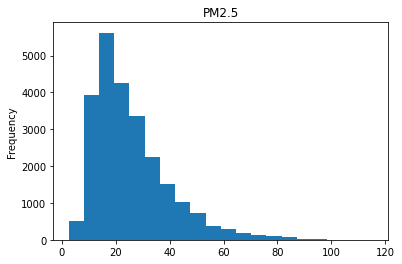

In [112]:
bangkok_df["PM2.5"].plot.hist(bins = 20, title = "PM2.5")

### See bangkok PM2.5 trend in 2016

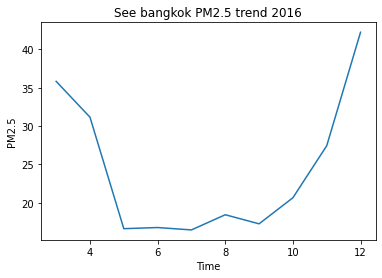

In [130]:
bangkok_2016_df = bangkok_df[bangkok_df["Year"] == 2016].groupby(["Month"]).mean()
plt.plot(bangkok_2016_df["PM2.5"])
plt.title("See bangkok PM2.5 trend 2016")
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.show()

### See bangkok PM2.5 trend in 2017

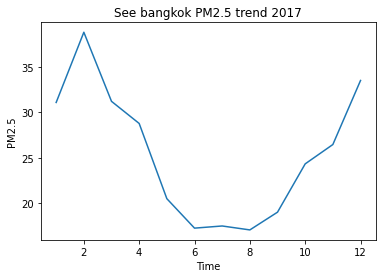

In [131]:
bangkok_2016_df = bangkok_df[bangkok_df["Year"] == 2017].groupby(["Month"]).mean()
plt.plot(bangkok_2016_df["PM2.5"])
plt.title("See bangkok PM2.5 trend 2017")
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.show()

### See bangkok PM2.5 trend in 2018

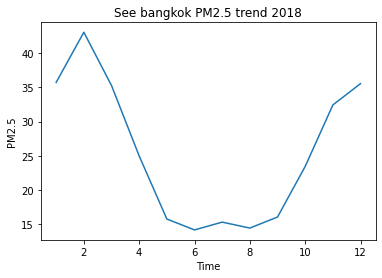

In [132]:
bangkok_2016_df = bangkok_df[bangkok_df["Year"] == 2018].groupby(["Month"]).mean()
plt.plot(bangkok_2016_df["PM2.5"])
plt.title("See bangkok PM2.5 trend 2018")
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.show()

### See bangkok PM2.5 trend in 2019

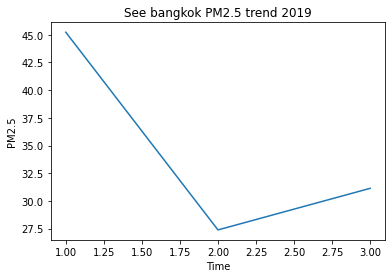

In [133]:
bangkok_2016_df = bangkok_df[bangkok_df["Year"] == 2019].groupby(["Month"]).mean()
plt.plot(bangkok_2016_df["PM2.5"])
plt.title("See bangkok PM2.5 trend 2019")
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.show()

# Wind
## 1) Bangkok
### 1.1) See information from wind bangkok dataframe

In [202]:
wind_bangkok_df = pd.read_csv("PM2.5_kaggle 2021/Bangkok/Train/3H_wind_Bangkok.csv")
wind_bangkok_df.head(5)

,datetime,WindDir,Wind Speed(km/h),lat,long
0,2016-03-03 01:00:00,45,13,13.754,100.5014
1,2016-03-03 04:00:00,60,11,13.754,100.5014
2,2016-03-03 07:00:00,65,15,13.754,100.5014
3,2016-03-03 10:00:00,75,13,13.754,100.5014
4,2016-03-03 13:00:00,70,12,13.754,100.5014


In [203]:
wind_bangkok_df.describe()

,WindDir,Wind Speed(km/h),lat,long
count,8880.000000,8880.000000,8.880000e+03,8.880000e+03
mean,173.300676,19.887387,1.375400e+01,1.005014e+02
std,93.670420,12.254249,7.532590e-13,1.735243e-11
min,0.000000,0.000000,1.375400e+01,1.005014e+02
25%,80.000000,11.000000,1.375400e+01,1.005014e+02
50%,175.000000,17.000000,1.375400e+01,1.005014e+02
75%,265.000000,26.000000,1.375400e+01,1.005014e+02
max,360.000000,76.000000,1.375400e+01,1.005014e+02


In [204]:
wind_bangkok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          8880 non-null   object 
 1   WindDir           8880 non-null   int64  
 2   Wind Speed(km/h)  8880 non-null   int64  
 3   lat               8880 non-null   float64
 4   long              8880 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 347.0+ KB


### 1.2) Check null value

In [205]:
check_null_all(wind_bangkok_df)

Number of null values in each column:
datetime            0
WindDir             0
Wind Speed(km/h)    0
lat                 0
long                0
dtype: int64


### Convert datetime(string type) to datetime(datetime type)

In [206]:
wind_bangkok_df["datetime_tmp"] = wind_bangkok_df["datetime"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
wind_bangkok_df

,datetime,WindDir,Wind Speed(km/h),lat,long,datetime_tmp
0,2016-03-03 01:00:00,45,13,13.754,100.5014,2016-03-03 01:00:00
1,2016-03-03 04:00:00,60,11,13.754,100.5014,2016-03-03 04:00:00
2,2016-03-03 07:00:00,65,15,13.754,100.5014,2016-03-03 07:00:00
3,2016-03-03 10:00:00,75,13,13.754,100.5014,2016-03-03 10:00:00
4,2016-03-03 13:00:00,70,12,13.754,100.5014,2016-03-03 13:00:00
...,...,...,...,...,...,...
8875,2019-03-17 10:00:00,110,26,13.754,100.5014,2019-03-17 10:00:00
8876,2019-03-17 13:00:00,95,23,13.754,100.5014,2019-03-17 13:00:00
8877,2019-03-17 16:00:00,65,15,13.754,100.5014,2019-03-17 16:00:00
8878,2019-03-17 19:00:00,70,17,13.754,100.5014,2019-03-17 19:00:00


### extract each datetime as columns feature

In [208]:
wind_bangkok_df = extract_date_string(wind_bangkok_df)
wind_bangkok_df.drop(columns = ["datetime"], inplace = True)
wind_bangkok_df.rename(columns = {"datetime_tmp":"datetime"} , inplace = True)

In [209]:
wind_bangkok_df

,WindDir,Wind Speed(km/h),lat,long,datetime,Year,Month,Day,UTC Hour
0,45,13,13.754,100.5014,2016-03-03 01:00:00,2016,3,3,1
1,60,11,13.754,100.5014,2016-03-03 04:00:00,2016,3,3,4
2,65,15,13.754,100.5014,2016-03-03 07:00:00,2016,3,3,7
3,75,13,13.754,100.5014,2016-03-03 10:00:00,2016,3,3,10
4,70,12,13.754,100.5014,2016-03-03 13:00:00,2016,3,3,13
...,...,...,...,...,...,...,...,...,...
8875,110,26,13.754,100.5014,2019-03-17 10:00:00,2019,3,17,10
8876,95,23,13.754,100.5014,2019-03-17 13:00:00,2019,3,17,13
8877,65,15,13.754,100.5014,2019-03-17 16:00:00,2019,3,17,16
8878,70,17,13.754,100.5014,2019-03-17 19:00:00,2019,3,17,19


### 1.3) See trend each attribute

<AxesSubplot:title={'center':'Wind direction bangkok distribution 2016-2019'}, ylabel='Frequency'>

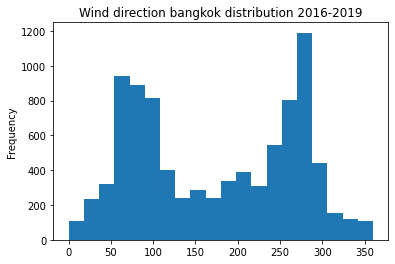

In [210]:
wind_bangkok_df["WindDir"].plot.hist(bins = 20, title = "Wind direction bangkok distribution 2016-2019")

### See bangkok wind trend in 2016

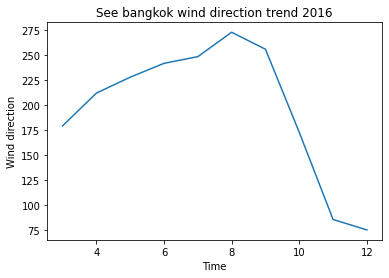

In [218]:
wind_bangkok_2016_df = wind_bangkok_df[wind_bangkok_df["datetime"] < datetime(2017,1,1,0,0,0)].groupby(["Month"]).mean()
plt.plot(wind_bangkok_2016_df["WindDir"])
plt.title("See bangkok wind direction trend 2016")
plt.xlabel("Time")
plt.ylabel("Wind direction")
plt.show()

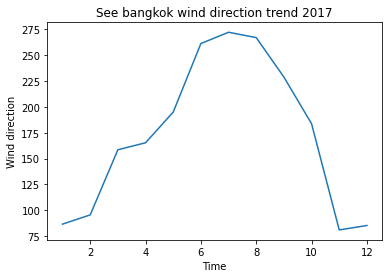

In [219]:
wind_bangkok_2016_df = wind_bangkok_df[ \
    (datetime(2017,1,1,0,0,0) <= wind_bangkok_df["datetime"]) & \
       (wind_bangkok_df["datetime"] < datetime(2018,1,1,0,0,0))].groupby(["Month"]).mean()
plt.plot(wind_bangkok_2016_df["WindDir"])
plt.title("See bangkok wind direction trend 2017")
plt.xlabel("Time")
plt.ylabel("Wind direction")
plt.show()

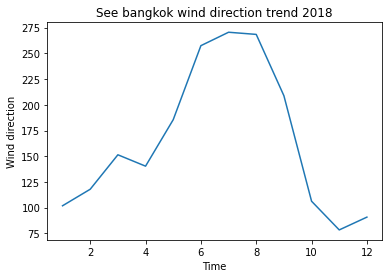

In [220]:
wind_bangkok_2016_df = wind_bangkok_df[ \
    (datetime(2018,1,1,0,0,0) <= wind_bangkok_df["datetime"]) & \
       (wind_bangkok_df["datetime"] < datetime(2019,1,1,0,0,0))].groupby(["Month"]).mean()
plt.plot(wind_bangkok_2016_df["WindDir"])
plt.title("See bangkok wind direction trend 2018")
plt.xlabel("Time")
plt.ylabel("Wind direction")
plt.show()

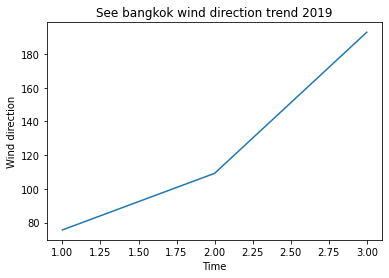

In [221]:
wind_bangkok_2016_df = wind_bangkok_df[ \
    (datetime(2019,1,1,0,0,0) <= wind_bangkok_df["datetime"]) & \
       (wind_bangkok_df["datetime"] < datetime(2020,1,1,0,0,0))].groupby(["Month"]).mean()
plt.plot(wind_bangkok_2016_df["WindDir"])
plt.title("See bangkok wind direction trend 2019")
plt.xlabel("Time")
plt.ylabel("Wind direction")
plt.show()

# Temperature

In [ ]:
pd.read_csv("PM2.5_kaggle 2021/Bangkok/Train/3H_temperature_Bangkok.csv").head(20)

# Hotspot

In [ ]:
df = pd.read_csv("PM2.5_kaggle 2021/Fire hotspot/fire_archive_M6_163549.csv")

In [ ]:
df.head(10)

In [ ]:
df["UTC Hour"] = df["acq_time"].apply(lambda x: str(x)[:-2])
df["UTC Min"] = df["acq_time"].apply(lambda x: str(x)[-2:])
df

In [ ]:
def create_datetime(df):
    df["datestr"] = df["Year"]+df["Month"]+df["Day"]+df["UTC Hour"]
    df["datetime"] = pd.to_datetime(df["datestr"], format="%Y%m%d%H")
    return df

In [ ]:
df["Year"] = df["acq_date"].apply(lambda x: str(x.split("-")[0]))
df["Month"] = df["acq_date"].apply(lambda x: str(x.split("-")[1]))
df["Day"] = df["acq_date"].apply(lambda x: str(x.split("-")[2]))

In [ ]:
 df["datestr"] = df["Year"]+df["Month"]+df["Day"]+df["UTC Hour"]+df["UTC Min"]
 df["datetime"] = pd.to_datetime(df["datestr"], format="%Y%m%d%H%M")

In [ ]:
df["datetime"] = df["datetime"] + timedelta(hours=7)
df

# Submission Example

In [ ]:
pd.read_excel("PM2.5_kaggle 2021/submission_example_Chanthaburi_3days.xlsx").head(20)

In [ ]:
pd.read_csv("PM2.5_kaggle 2021/submission_example_Kaggle.csv").head(20)